# Assignment-02 DAI-101

The aim of this project is to create a predictive model which allows the estimation of amounts of tips depending on customer billing and demographic details. Such a model would enable restaurants to gain better insight into what and how factors affect tipping, thereby making data-driven decisions that could be tailored towards services encouraging fair tipping practices.

Objective

Identify what factors, such as the total bill or the hour of the day, most influence tips.

Build and Evaluate Models: Utilize different types of regression techniques, including Linear Regression, Ridge, Lasso, Decision Trees, among others, for building as well as testing your model in the prediction of tips.

Provide Insights to Management: Propose specific recommendations, actionable, for the management of the restaurant on how to enhance customer service and revenues in line with the predictions of the model.

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.api import linear_rainbow
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [125]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\tips (data for regression problem).csv')

In [126]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [128]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [129]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [130]:
#converting categorical into numerical
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [131]:
scaler = StandardScaler()
df[['total_bill', 'size']] = scaler.fit_transform(df[['total_bill', 'size']])

In [132]:
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,-0.314711,1.01,-0.600193,False,False,False,True,False,False
1,-1.063235,1.66,0.453383,True,False,False,True,False,False
2,0.137780,3.50,0.453383,True,False,False,True,False,False
3,0.438315,3.31,-0.600193,True,False,False,True,False,False
4,0.540745,3.61,1.506958,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,1.040511,5.92,0.453383,True,False,True,False,False,False
240,0.832275,2.00,-0.600193,False,True,True,False,False,False
241,0.324630,2.00,-0.600193,True,True,True,False,False,False
242,-0.221287,1.75,-0.600193,True,False,True,False,False,False


# EDA

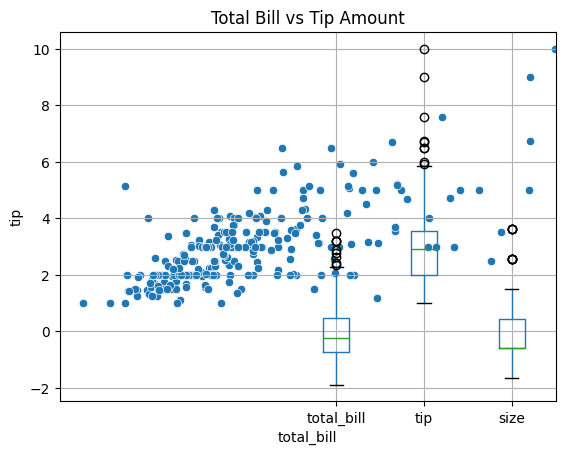

In [133]:
#Scatter plot
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title("Total Bill vs Tip Amount")
plt.show()

> This shows a scatter plot between total_bill and tip which shows a relationship close to linear

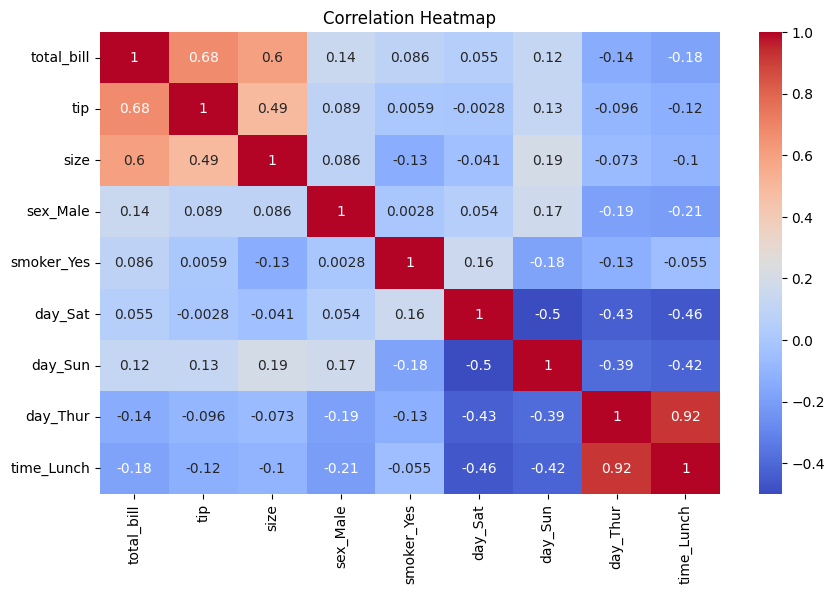

In [134]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

> This plot shows the correlation of features wih each other and which again shows close to linear relation between total_bill and tip

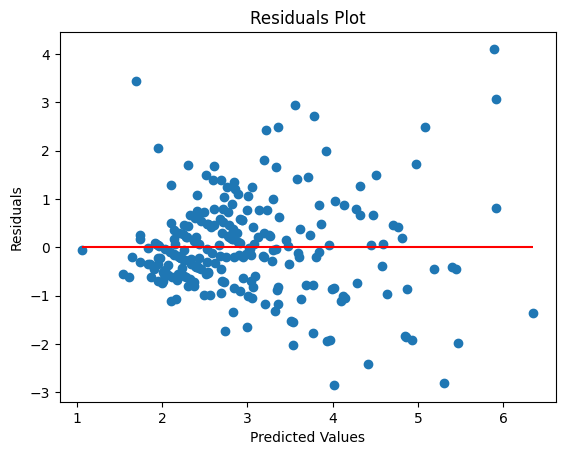

In [135]:
# Residuals Plot
X = df.drop('tip', axis=1)
y = df['tip']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

residuals = y - predictions
plt.scatter(predictions, residuals)
plt.hlines(0, xmin=predictions.min(), xmax=predictions.max(), color="red")
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

> The residuals plot shows a generally random scatter around the zero line, indicating a reasonable fit, but there is some outliers as residuals increase with predicted values. This suggests potential improvements could be made by addressing variance issues or trying a non-linear model.

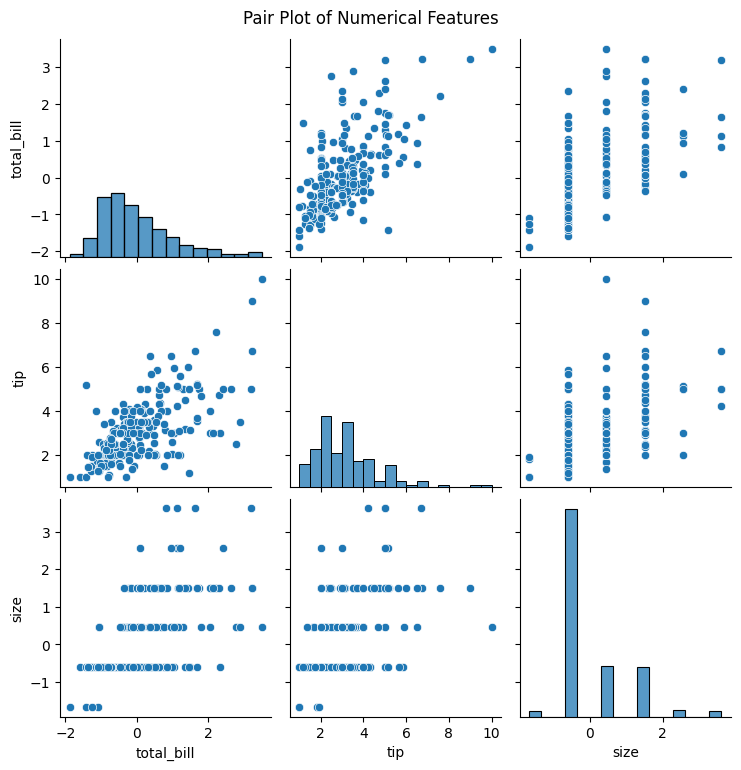

In [136]:
#pair-plot of numerical
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

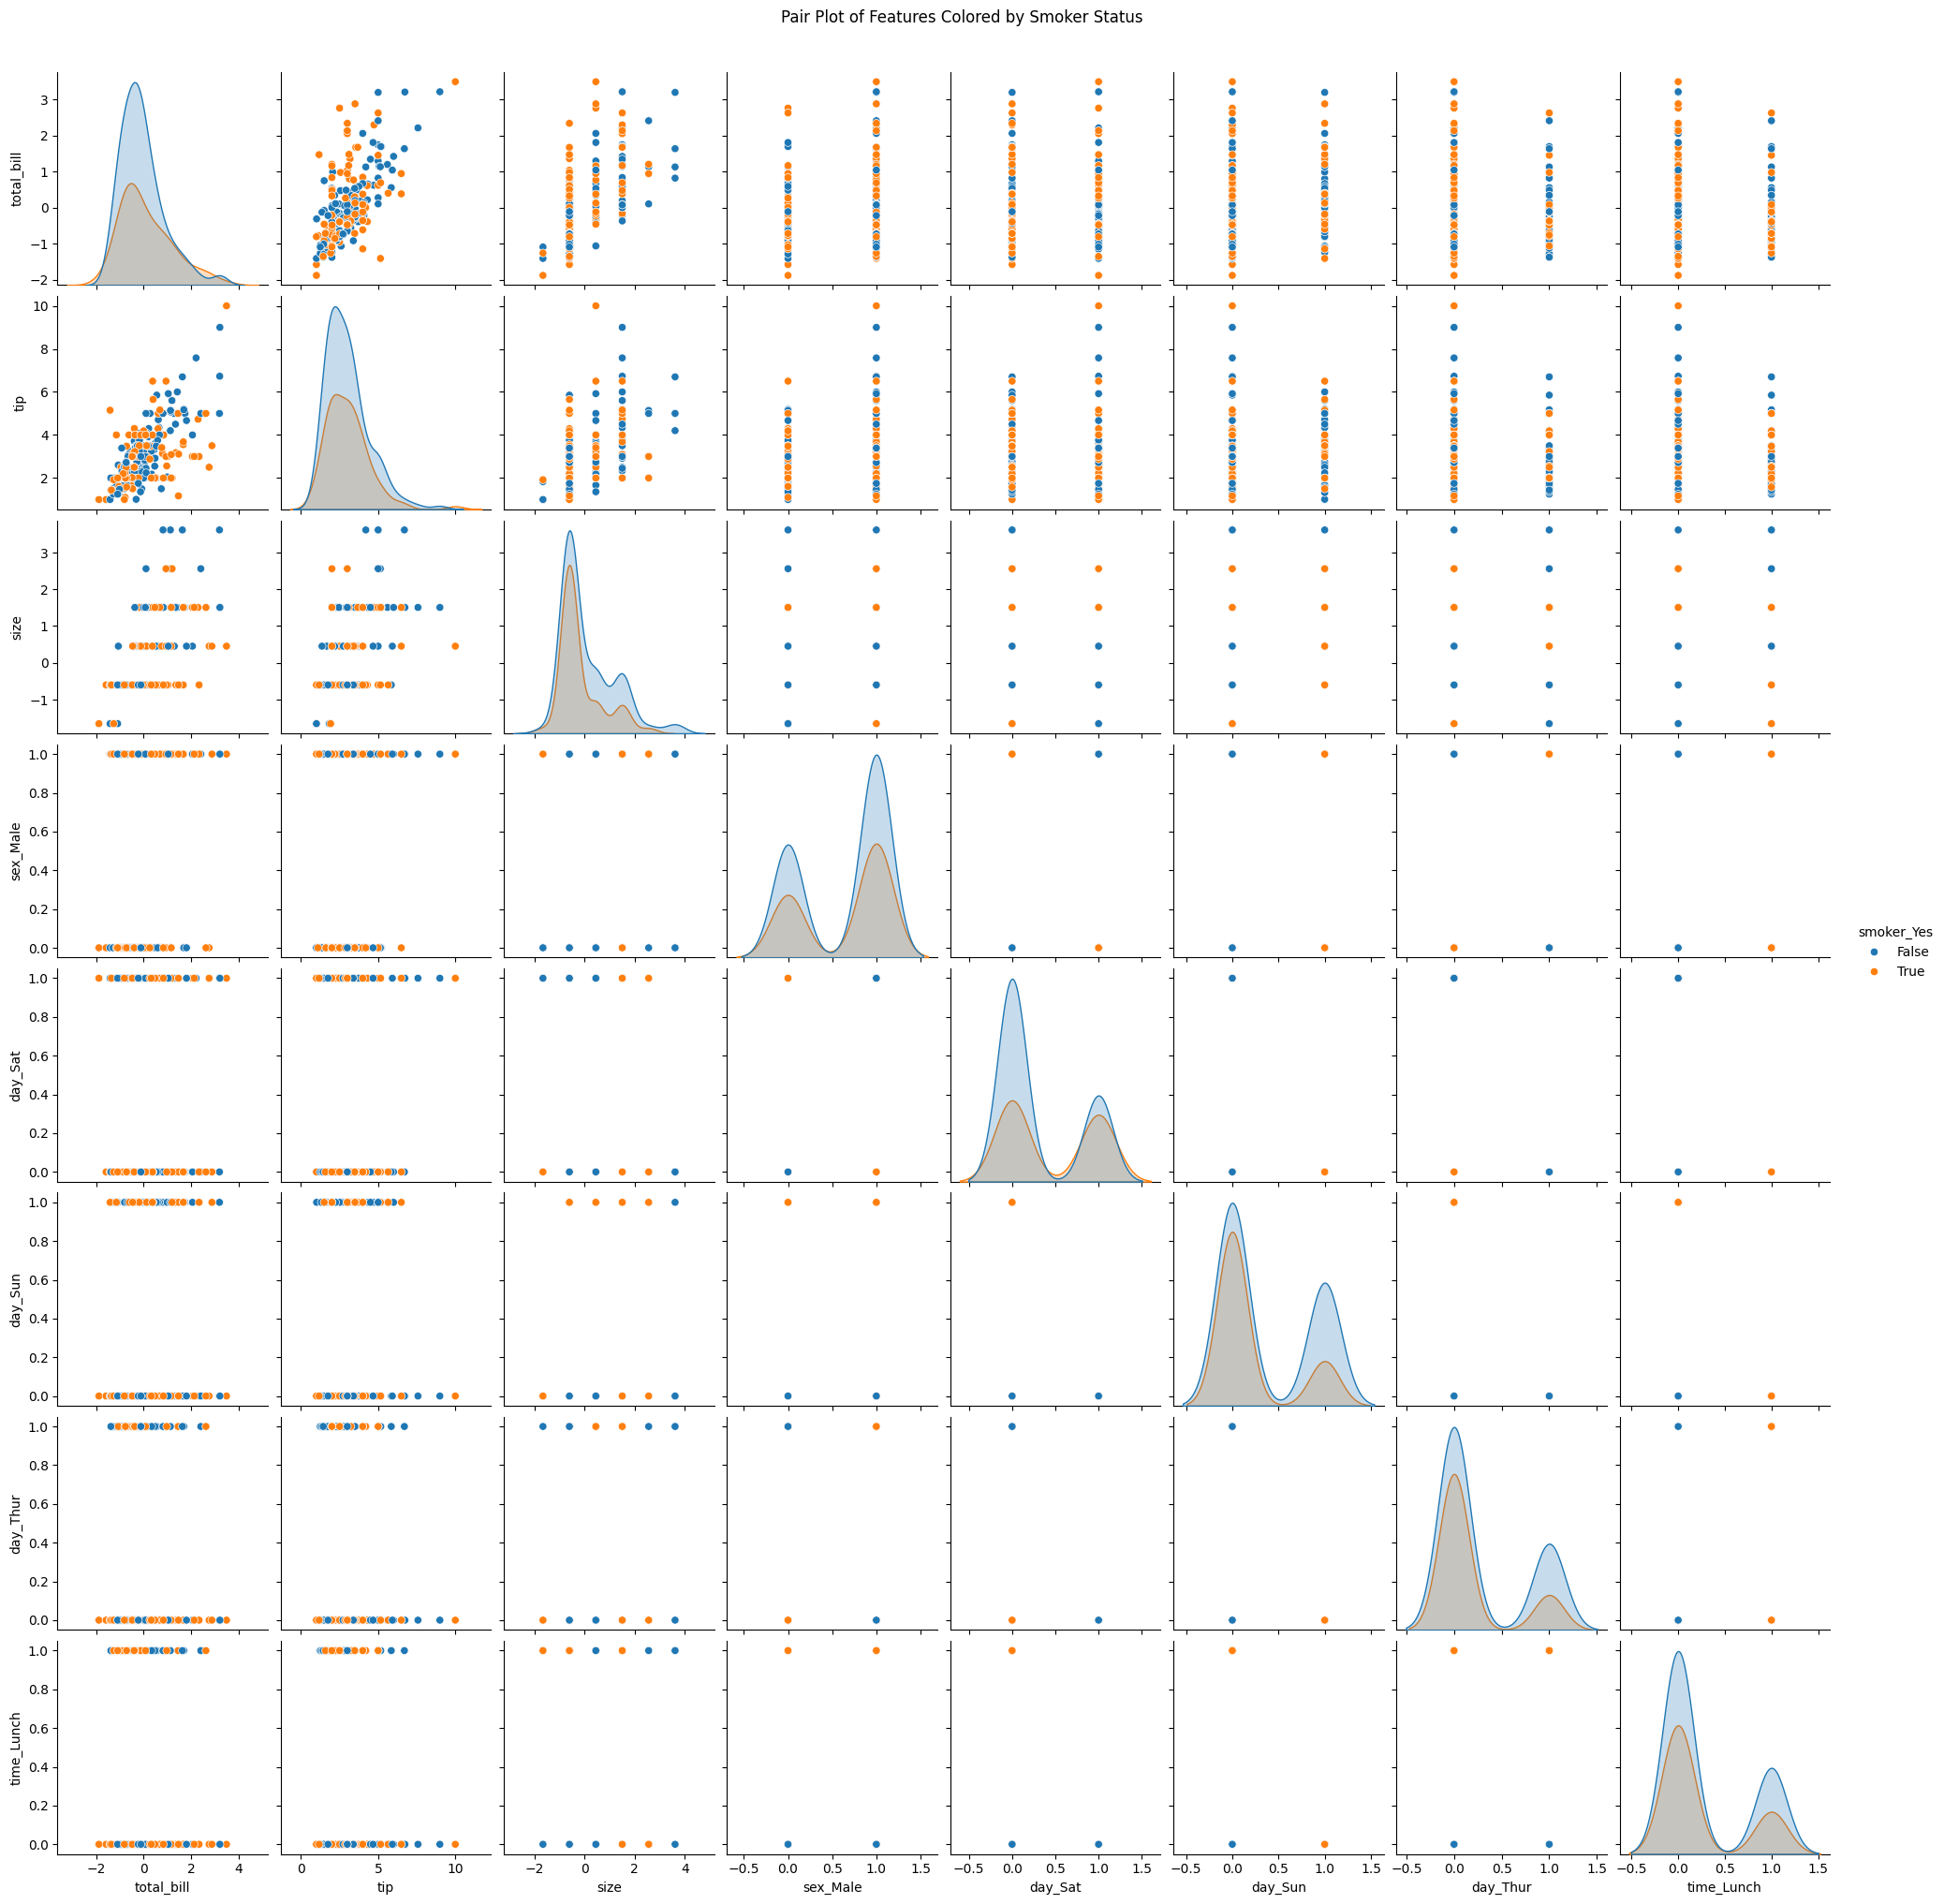

In [137]:
#pair-plot according to one of categorical variable
sns.pairplot(df, hue='smoker_Yes')
plt.suptitle("Pair Plot of Features Colored by Smoker Status", y=1.02)
plt.show()

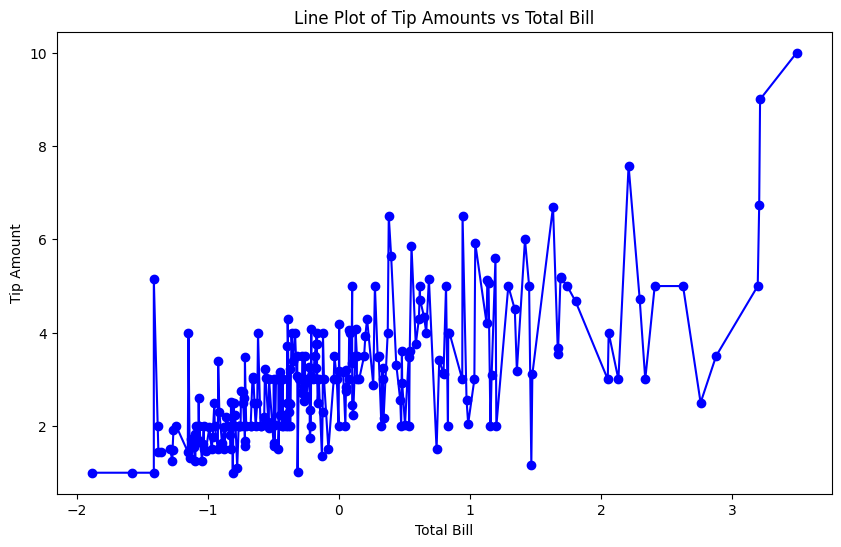

In [138]:
df_sorted = df.sort_values(by='total_bill')

# Line plot of total_bill vs tip
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['total_bill'], df_sorted['tip'], marker='o', linestyle='-', color='b')
plt.title("Line Plot of Tip Amounts vs Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()

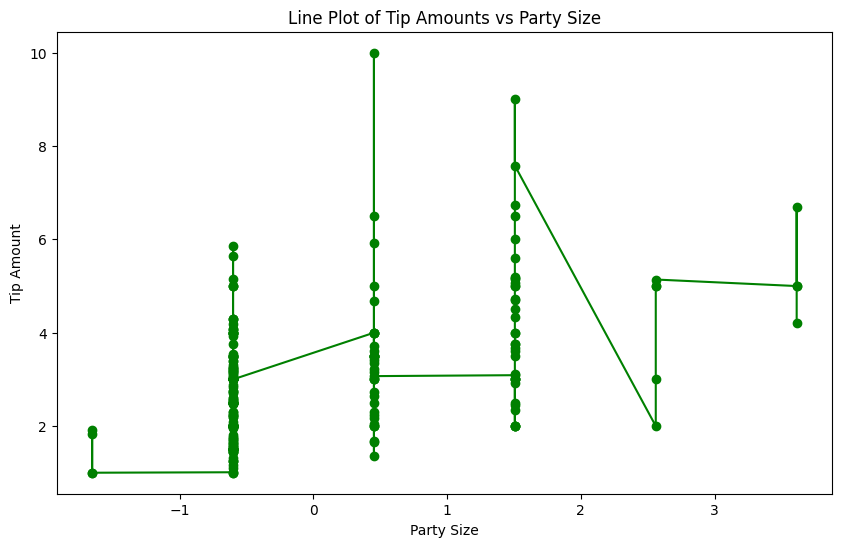

In [139]:
df_sorted = df.sort_values(by='size')

# Line plot of size vs tip
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['size'], df_sorted['tip'], marker='o', linestyle='-', color='g')
plt.title("Line Plot of Tip Amounts vs Party Size")
plt.xlabel("Party Size")
plt.ylabel("Tip Amount")
plt.show()

In [140]:
X=X.astype(float)
X_sm = sm.add_constant(X)  # Add intercept for statsmodels
model_sm = sm.OLS(y, X_sm).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model_sm)
print(f"Rainbow Test p-value: {rainbow_p_val}")

Rainbow Test p-value: 0.16588383059241654


> The high value (>0.5) of P generally suggests that Linear model must be used

# Model Evaluation

In [108]:
#Seperating the data into 80%training and 20%testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")
    return model

In [110]:
print("Linear Regression:")
lin_reg = LinearRegression()
evaluate_model(lin_reg, X_train, X_test, y_train, y_test)

Linear Regression:
MAE: 0.6671331480264893, MSE: 0.7033566017436103, R2: 0.43730181943482516


LinearRegression()

In [111]:
linear_model = LinearRegression().fit(X_train, y_train)
print("Feature Importance in Linear Regression:")
fli=pd.Series(linear_model.coef_, index=X.columns).sort_values(ascending=False)
print(fli)

Feature Importance in Linear Regression:
total_bill    0.841327
size          0.221611
time_Lunch    0.094957
sex_Male      0.028819
day_Sun      -0.050793
day_Thur     -0.179721
day_Sat      -0.185785
smoker_Yes   -0.192353
dtype: float64


In [112]:
print("Ridge Regression:")
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, X_test, y_train, y_test)

print("Lasso Regression:")
lasso = Lasso(alpha=0.1)
evaluate_model(lasso, X_train, X_test, y_train, y_test)

Ridge Regression:
MAE: 0.6668621239595699, MSE: 0.7006322795075869, R2: 0.4394813271862039
Lasso Regression:
MAE: 0.654882734592278, MSE: 0.6121051239307194, R2: 0.5103046751866708


Lasso(alpha=0.1)

In [113]:
ridge_model = Ridge().fit(X_train, y_train)
lasso_model = Lasso().fit(X_train, y_train)
print("Feature Importance in Ridge Regression:")
fr=pd.Series(linear_model.coef_, index=X.columns).sort_values(ascending=False)
print(fr)
print("Feature Importance in Lasso Regression:")
fla=pd.Series(linear_model.coef_, index=X.columns).sort_values(ascending=False)
print(fla)

Feature Importance in Ridge Regression:
total_bill    0.841327
size          0.221611
time_Lunch    0.094957
sex_Male      0.028819
day_Sun      -0.050793
day_Thur     -0.179721
day_Sat      -0.185785
smoker_Yes   -0.192353
dtype: float64
Feature Importance in Lasso Regression:
total_bill    0.841327
size          0.221611
time_Lunch    0.094957
sex_Male      0.028819
day_Sun      -0.050793
day_Thur     -0.179721
day_Sat      -0.185785
smoker_Yes   -0.192353
dtype: float64


In [114]:
print("Decision Tree Regression:")
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
evaluate_model(dt, X_train, X_test, y_train, y_test)

Decision Tree Regression:
MAE: 0.6905450649124119, MSE: 0.8489901694047068, R2: 0.32079229446702484


DecisionTreeRegressor(max_depth=5, random_state=42)

In [115]:
tree_model = DecisionTreeRegressor().fit(X_train, y_train)
print("Feature Importance in Decision Tree Regression:")
ftr=pd.Series(tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ftr)

Feature Importance in Decision Tree Regression:
total_bill    0.742810
smoker_Yes    0.089560
size          0.062185
day_Sun       0.042220
sex_Male      0.026195
day_Sat       0.020089
time_Lunch    0.009393
day_Thur      0.007548
dtype: float64


In [116]:
print("Random Forest Regression:")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test)

Random Forest Regression:
MAE: 0.7532163265306124, MSE: 0.919451825714287, R2: 0.2644216771916328


RandomForestRegressor(random_state=42)

In [117]:
print("Feature Importance in Random Forest:")
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Feature Importance in Random Forest:
total_bill    0.767043
smoker_Yes    0.069417
size          0.058045
day_Sat       0.030292
day_Sun       0.025223
sex_Male      0.025187
time_Lunch    0.012975
day_Thur      0.011818
dtype: float64


In [118]:
print("Support Vector Regression:")
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
evaluate_model(svr, X_train, X_test, y_train, y_test)

Support Vector Regression:
MAE: 0.8586410037634313, MSE: 1.3938342268306674, R2: -0.11509294361181266


SVR(C=100)

In [119]:
svr_model = SVR().fit(X_train, y_train)
perm_importance = permutation_importance(svr_model, X_train, y_train, n_repeats=10, random_state=42)
print("Feature Importance in Support Vector Regression:")
fsvr=pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print(fsvr)

Feature Importance in Support Vector Regression:
total_bill    0.641324
size          0.168903
smoker_Yes    0.088033
day_Sun       0.038958
day_Sat       0.032417
sex_Male      0.020847
day_Thur      0.014316
time_Lunch    0.013110
dtype: float64


In [120]:
print("K-Nearest Neighbors Regression:")
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, X_train, X_test, y_train, y_test)

K-Nearest Neighbors Regression:
MAE: 0.7199591836734693, MSE: 0.8376828571428571, R2: 0.32983835164634523


KNeighborsRegressor()

In [121]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
perm_importance_knn = permutation_importance(knn_model, X_train, y_train, n_repeats=10, random_state=42)
print("Feature Importance in KNN Regression:")
fKn = pd.Series(perm_importance_knn.importances_mean, index=X.columns).sort_values(ascending=False)
print(fKn)

Feature Importance in KNN Regression:
total_bill    0.630671
size          0.212841
smoker_Yes    0.071091
day_Sat       0.015675
sex_Male     -0.005881
time_Lunch   -0.006068
day_Thur     -0.007369
day_Sun      -0.007717
dtype: float64


> Based on above obtained results Lasso Regression test has the least MSE and R² values.

> Therefore, Lasso Regression would be best model for this dataset